In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

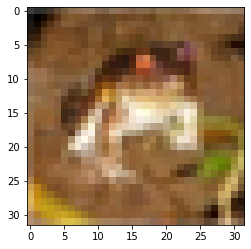

In [6]:
plt.imshow(x_train[0])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
model.fit(x_train, y_cat_train, epochs=15, 
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 35s 704us/sample - loss: 1.6692 - accuracy: 0.3792 - val_loss: 1.4672 - val_accuracy: 0.4514
Epoch 2/15
50000/50000 [==============================] - 32s 647us/sample - loss: 1.3568 - accuracy: 0.5071 - val_loss: 1.2749 - val_accuracy: 0.5413
Epoch 3/15
50000/50000 [==============================] - 32s 647us/sample - loss: 1.2383 - accuracy: 0.5548 - val_loss: 1.2884 - val_accuracy: 0.5427
Epoch 4/15
50000/50000 [==============================] - 36s 719us/sample - loss: 1.1622 - accuracy: 0.5845 - val_loss: 1.1829 - val_accuracy: 0.5780
Epoch 5/15
50000/50000 [==============================] - 35s 698us/sample - loss: 1.1079 - accuracy: 0.6039 - val_loss: 1.1686 - val_accuracy: 0.5842
Epoch 6/15
50000/50000 [==============================] - 35s 704us/sample - loss: 1.0635 - accuracy: 0.6187 - val_loss: 1.1139 - val_accuracy: 0.6033
Epoch 7/15
50000/50000 [====================

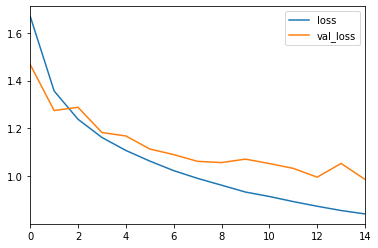

In [17]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

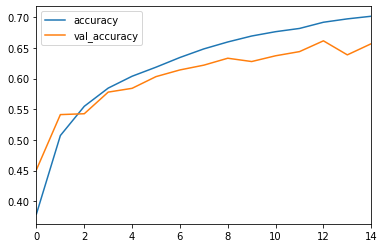

In [18]:
metrics[['accuracy', 'val_accuracy']].plot()

In [19]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9870129377365112, 0.657]

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1000
           1       0.75      0.84      0.79      1000
           2       0.56      0.54      0.55      1000
           3       0.46      0.47      0.47      1000
           4       0.56      0.67      0.61      1000
           5       0.60      0.51      0.55      1000
           6       0.80      0.70      0.75      1000
           7       0.64      0.74      0.69      1000
           8       0.74      0.77      0.75      1000
           9       0.84      0.64      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [21]:
confusion_matrix(y_test, predictions)

array([[682,  27,  55,  15,  50,   6,   6,  24, 115,  20],
       [ 34, 839,   4,  17,   5,   5,   4,   7,  43,  42],
       [ 60,  14, 536,  74, 144,  60,  42,  50,  13,   7],
       [ 22,  13,  89, 473,  96, 161,  46,  77,  16,   7],
       [ 13,   3,  67,  53, 673,  29,  38, 109,  12,   3],
       [  9,   7,  72, 218,  70, 507,  18,  84,   8,   7],
       [  3,  16,  66,  94,  61,  23, 705,  21,   7,   4],
       [ 14,   4,  40,  45,  90,  43,   8, 742,   6,   8],
       [100,  40,  20,  20,   9,   6,   5,   9, 769,  22],
       [ 51, 151,  12,  24,  13,   9,   9,  37,  50, 644]])

In [22]:
import seaborn as sns

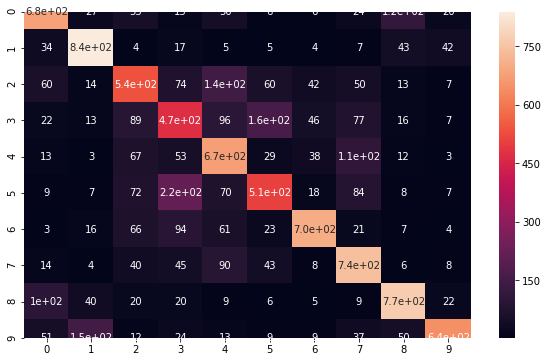

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

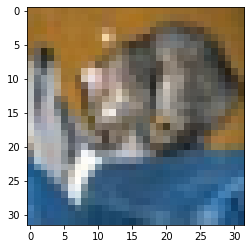

In [24]:
plt.imshow(x_test[0].reshape(32, 32, 3))

In [25]:
my_image = x_test[0]

In [26]:
model.predict_classes(my_image.reshape(1, 32, 32, 3))

array([3])

In [27]:
y_test[0]

array([3], dtype=uint8)